In [0]:
#Import the pandas library to read our dataset 
import pandas as pd

# Reads a comma-separated value (CSV) file 
dataset = pd.read_csv('/content/housing.csv')

# Remove any incomplete entries 
dataset = dataset.dropna()

# View the first five rows of the dataset 
print("First 10 records of the dataset:")
dataset.head(10)

First 10 records of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


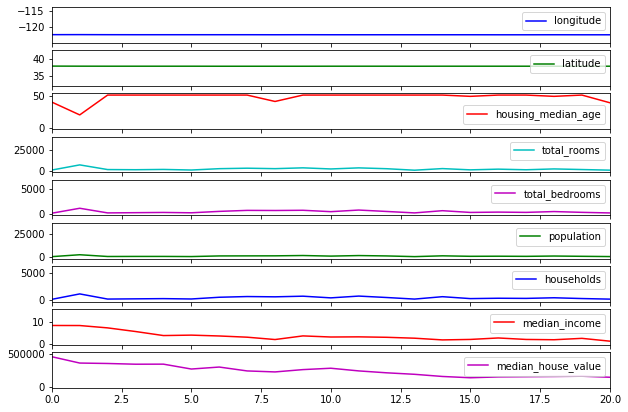

In [0]:
import matplotlib.pyplot as plt
y1=dataset['longitude']
y2=dataset['latitude']
y3=dataset['housing_median_age']
y4=dataset['total_rooms']
y5=dataset['total_bedrooms']
y6=dataset['population']
y7=dataset['households']
y8=dataset['median_income']
y9=dataset['median_house_value']

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(911,xlim=(0,20),xticklabels=[])
ax2 = fig.add_subplot(912,xlim=(0,20),xticklabels=[])
ax3 = fig.add_subplot(913,xlim=(0,20),xticklabels=[])
ax4 = fig.add_subplot(914,xlim=(0,20),xticklabels=[])
ax5 = fig.add_subplot(915,xlim=(0,20),xticklabels=[])
ax6 = fig.add_subplot(916,xlim=(0,20),xticklabels=[])
ax7 = fig.add_subplot(917,xlim=(0,20),xticklabels=[])
ax8 = fig.add_subplot(918,xlim=(0,20),xticklabels=[])
ax9 = fig.add_subplot(919,xlim=(0,20))
ax1.plot(y1,'b',label='longitude')
ax2.plot(y2,'g',label='latitude')
ax3.plot(y3,'r',label='housing_median_age')
ax4.plot(y4,'c',label='total_rooms')
ax5.plot(y5,'m',label='total_bedrooms')
ax6.plot(y6,'g',label='population')
ax7.plot(y7,'b',label='households')
ax8.plot(y8,'r',label='median_income')
ax9.plot(y9,'m',label='median_house_value');
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()

In [0]:
# Import the numpy library to work with and manipulate the data
import numpy as np

# Get the train/test split package from sklearn for preparing our dataset to # train and test the model with
from sklearn.model_selection import train_test_split

# Predict the "median_house_value" column 
Y = dataset['median_house_value']

# The remainder of the columns will be used to predict Y
# Select from the "longitude" column to the "median_income" column 
X= dataset.loc[:, 'longitude':'median_income']

# Splits the dataset so 70% is used for training and 30% for testing 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 2003)


# Converts the datasets to numpy arrays to work with our PyTorch model
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

# Convert the testing data 
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()
print(x_train_np.shape,y_train_np.shape,x_test_np.shape,y_test_np.shape)
print(x_train_np)

(14303, 8) (14303,) (6130, 8) (6130,)
[[-1.2252e+02  3.7890e+01  1.7000e+01 ...  1.6400e+03  9.8900e+02
   3.9531e+00]
 [-1.1776e+02  3.4060e+01  3.3000e+01 ...  1.6250e+03  4.7200e+02
   1.9937e+00]
 [-1.2224e+02  4.0450e+01  2.7000e+01 ...  7.8200e+02  3.0000e+02
   3.5978e+00]
 ...
 [-1.1822e+02  3.3890e+01  4.1000e+01 ...  7.7600e+02  2.0700e+02
   2.1250e+00]
 [-1.2192e+02  3.7480e+01  2.3000e+01 ...  1.9720e+03  6.2300e+02
   5.3813e+00]
 [-1.2241e+02  3.7740e+01  5.2000e+01 ...  4.1500e+02  1.5900e+02
   1.9464e+00]]


In [0]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train_np)
x_train_np = scaler.transform(x_train_np)
print(x_train_np) 
print(x_train_np.shape)

[[-1.4705277   1.05454652 -0.9240538  ...  0.18534899  1.27417708
   0.04424569]
 [ 0.9120083  -0.7397616   0.34963415 ...  0.17235011 -0.07348215
  -0.9910515 ]
 [-1.33037853  2.25387519 -0.12799883 ... -0.55818657 -0.521833
  -0.14348581]
 ...
 [ 0.68176322 -0.81940452  0.98647813 ... -0.56338612 -0.76425526
  -0.92167592]
 [-1.17020804  0.86246654 -0.44642081 ...  0.47305738  0.32012819
   0.79887029]
 [-1.4154691   0.98427336  1.8621386  ... -0.87622567 -0.88937642
  -1.01604362]]
(14303, 8)


In [0]:
# import the pytorch library
import torch
import time

# Import the 1D convolution layer
# Since we’re inputting a 1-dimensional row of data, we can’t use 2D or 3D
from torch.nn import Conv1d

# Import the max pooling layer
from torch.nn import MaxPool1d

# Import the flatten layer
from torch.nn import Flatten

# Import the linear layer 
from torch.nn import Linear

# Import the ReLU activation function
from torch.nn.functional import relu

# Import the DataLoader and TensorDataset libraries from PyTorch
 # to work with our datasets
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import SGD
from torch.nn import L1Loss
from torch.nn import MSELoss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [0]:
# Our class MUST be a subclass of torch.nn.Module 
class CnnRegressor(torch.nn.Module):

# Define the initialization method
  def __init__(self, batch_size, inputs, outputs):
# Initialize the superclass and store the parameters 
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

# Define the input layer
# (input channels, output channels, kernel size) 
    self.input_layer = Conv1d(inputs, batch_size, 1) 

# Define a max pooling layer # (kernel size)
    self.max_pooling_layer = MaxPool1d(1)
# Define another convolution layer 
    self.conv_layer = Conv1d(batch_size, 128, 1)
# Define a flatten layer
    self.flatten_layer = Flatten()

# Define a linear layer
# (inputs, outputs)
    self.linear_layer = Linear(128, 64)

# Finally, define the output layer
    self.output_layer = Linear(64, outputs)

# Define a method to feed inputs through the model
  def feed(self,input):

# Reshape the entry so it can be fed to the input layer
# Although we’re using 1D convolution, it still expects a 3D array to process in a 1D fashion
    input = input.reshape((self.batch_size, self.inputs,1))


# Get the output of the first layer and run it through the 
# the ReLU activation function
    output = relu(self.input_layer(input))

# Get the output of the max pooling layer
    output = self.max_pooling_layer(output)

# Get the output of the second convolution layer and run it 
# through the ReLU activation function
    output = relu(self.conv_layer(output))

# Get the output of the flatten layer 
    output = self.flatten_layer(output)

# Get the output of the linear layer and run it through the 
# ReLU activation function
    output = self.linear_layer(output)

# Finally, get the output of the output layer and return it 
    output = self.output_layer(output)
    return output

In [0]:
# Define the batch size we'd like to use 
batch_size = 32
# (batch size, X columns, Y columns)
model = CnnRegressor(batch_size, X.shape[1], 1)

# Set the model to use the GPU for processing 
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 32, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(32, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [0]:
# This method will return the average L1 loss and R^2 score 
# of the passed model on the passed DataLoader
def model_loss(model, dataset, train = False, optimizer = None):

# Cycle through the batches and get the average L1 loss 
  performance  = L1Loss()
  score_metric = R2Score()
  avg_loss = 0
  avg_score = 0
  count = 0
  for input, output in iter(dataset):

# Get the model's predictions for the training dataset 
    predictions = model.feed(input)

# Get the model's loss
    loss = performance(predictions, output)

# Get the model's R^2 score 
    score_metric.update([predictions, output])
    score = score_metric.compute()
    if(train):

# Clear any errors so they don't cummulate 
      optimizer.zero_grad()

# Compute the gradients for our optimizer 
      loss.backward()
# Use the optimizer to update the model's parameters based on the gradients
      optimizer.step()
# Store the loss and update the counter
    avg_loss += loss.item()
    avg_score += score
    count += 1

  return avg_loss / count, avg_score / count

In [0]:
# Training
epochs = 500  # number of epochs to train for

# Define the performance measure and optimizer 
optimizer = SGD(model.parameters(), lr=1e-5)

# Convert the training set into torch variables for our model using the GPU 
# as floats. The reshape is to remove a warning pytorch outputs otherwise. 
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs=torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

# Create a DataLoader instance to work with our batches 
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
t1 = time.time()
loss_history = []
score_history = []

# Start the training loop 
for epoch in range(epochs):

# Cycle through the batches and get the average loss
  avg_loss, avg_r2_score= model_loss(model, loader, train=True,optimizer=optimizer)
  loss_history.append(avg_loss)
  score_history.append(avg_r2_score)

# Output the average loss
  print("Epoch " + str(epoch + 1) + 
        ":\n\tLoss=" + str(avg_loss)+ 
        "\n\tR^2 Score= " + str(avg_r2_score))
t2=time.time()
t3=t2-t1
print('Training Time:',np.round(t3,2),'seconds')

Epoch 1:
	Loss=206923.60355941704
	R^2 Score= -3.25221651469318
Epoch 2:
	Loss=206890.56743974215
	R^2 Score= -3.2081546035432593
Epoch 3:
	Loss=206952.01762191704
	R^2 Score= -3.1904802723324908
Epoch 4:
	Loss=206889.84756866592
	R^2 Score= -3.2265107511726634
Epoch 5:
	Loss=206924.13340807174
	R^2 Score= -3.201686876248756
Epoch 6:
	Loss=206942.33793441704
	R^2 Score= -3.2096347865983583
Epoch 7:
	Loss=206890.84606221973
	R^2 Score= -3.2170310100881
Epoch 8:
	Loss=206907.53002382288
	R^2 Score= -3.2201096260129782
Epoch 9:
	Loss=206929.45508688342
	R^2 Score= -3.201603409610528
Epoch 10:
	Loss=206850.30139433857
	R^2 Score= -3.2551807220599844
Epoch 11:
	Loss=206910.3347463565
	R^2 Score= -3.2057125196033156
Epoch 12:
	Loss=206897.6050308296
	R^2 Score= -3.2959298867133877
Epoch 13:
	Loss=206926.79571889012
	R^2 Score= -3.2354464701930756
Epoch 14:
	Loss=206931.19688901346
	R^2 Score= -3.27036949027538
Epoch 15:
	Loss=206905.20946608746
	R^2 Score= -3.255621821513587
Epoch 16:
	Loss=

In [0]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

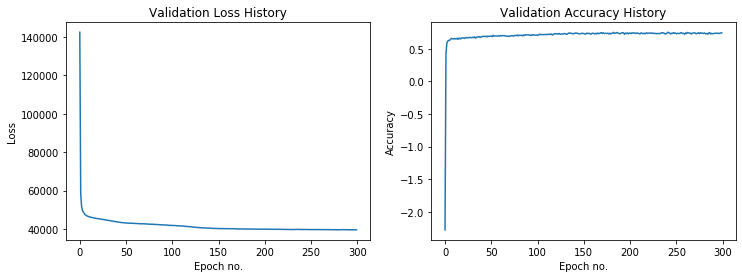

In [0]:
import matplotlib.pyplot as plt
fig,a = plt.subplots(1,2,figsize=(12, 4))
a[0].plot(loss_history[200:500],label='loss')
a[0].set_title('Validation Loss History')
a[0].set_xlabel('Epoch no.')
a[0].set_ylabel('Loss')
a[1].plot(score_history[200:500],label='score')
a[1].set_title('Validation Accuracy History')
a[1].set_xlabel('Epoch no.')
a[1].set_ylabel('Accuracy');
plt.show()

In [0]:
# Testing
inputs = torch.from_numpy(x_test_np).cuda().float()

outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs,outputs)
loader = DataLoader(tensor,batch_size, shuffle=True,drop_last=True)
avg_loss,avg_r2_score = model_loss(model,loader)
print("the model's L1 loss is :" + str(loss_history[499]))
print("the model's R^2 Score is :" + str(score_history[499]))

the model's L1 loss is :39564.22450865331
the model's R^2 Score is :0.7456630467822412


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# model_save_name = 'classifier.pt'
path = "/content/gdrive/My Drive/1093483_1dconv_reg" 
torch.save(model.state_dict(), path)